In [24]:
import string
import sys,csv,re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra

sns.set_style('darkgrid')

In [2]:

pkp2020 = pd.read_csv('pkp2020.csv', names=["Date", "Text", "Location"])
pkp2021 = pd.read_csv('pkp2021.csv', names=["Date", "Text", "Location"])

mco2020 = pd.read_csv('MCO2020.csv', names=["Date", "Text", "Location"])
mco2021 = pd.read_csv('MCO2021.csv', names=["Date", "Text", "Location"])

lockdown2020 = pd.read_csv('lockdown2020.csv', names=["Date", "Text", "Location"])
lockdown2021 = pd.read_csv('lockdown2021.csv', names=["Date", "Text", "Location"])

Movementcontrolorder2020 = pd.read_csv('Movementcontrolorder2020.csv', names=["Date", "Text", "Location"])
Movementcontrolorder2021 = pd.read_csv('Movementcontrolorder2021.csv', names=["Date", "Text", "Location"])

perintah2020 = pd.read_csv('perintah2020.csv', names=["Date", "Text", "Location"])
perintah2021 = pd.read_csv('perintah2021.csv', names=["Date", "Text", "Location"])



In [3]:
# append method
tweet2020 = pkp2020.append(mco2020)
tweet2020 = tweet2020.append(lockdown2020)
tweet2020 = tweet2020.append(Movementcontrolorder2020)
tweet2020 = tweet2020.append(perintah2020)
tweet2020 = tweet2020.drop(columns=['Location'])

tweet2021 = pkp2021.append(mco2021)
tweet2021 = tweet2021.append(lockdown2021)
tweet2021 = tweet2021.append(Movementcontrolorder2021)
tweet2021 = tweet2021.append(perintah2021)
tweet2021 = tweet2021.drop(columns=['Location'])


In [4]:
newdf20 = tweet2020.drop_duplicates(subset=['Text'])
newdf21 = tweet2021.drop_duplicates(subset=['Text'])

In [5]:
#Case Fold - All LowerCase
newdf20['Text'] = newdf20['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
newdf21['Text'] = newdf21['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


<ipython-input-5-b06509a0319e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text'] = newdf20['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-5-b06509a0319e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf21['Text'] = newdf21['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [6]:
#Removing Punctuation and Hashtag
'^https?:\/\/.*[\r\n]*'
newdf20['Text_punc'] = newdf20['Text'].str.replace('[^\w\s]','')
newdf21['Text_punc'] = newdf21['Text'].str.replace('[^\w\s]','')


<ipython-input-6-e0f5259cf072>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf20['Text_punc'] = newdf20['Text'].str.replace('[^\w\s]','')
<ipython-input-6-e0f5259cf072>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text_punc'] = newdf20['Text'].str.replace('[^\w\s]','')
<ipython-input-6-e0f5259cf072>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf21['Text_punc'] = newdf21['Text'].str.replace('[^\w\s]','')
<ipython-input-6-e0f5259cf072>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [7]:
#Removing Hyperlink

newdf20['Text_Hyper'] = newdf20['Text_punc'].str.replace('^https?:\/\/.*[\r\n]*','')
newdf21['Text_Hyper'] = newdf21['Text_punc'].str.replace('[^\w\s]','')


<ipython-input-7-fc58738cad64>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf20['Text_Hyper'] = newdf20['Text_punc'].str.replace('^https?:\/\/.*[\r\n]*','')
<ipython-input-7-fc58738cad64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text_Hyper'] = newdf20['Text_punc'].str.replace('^https?:\/\/.*[\r\n]*','')
<ipython-input-7-fc58738cad64>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf21['Text_Hyper'] = newdf21['Text_punc'].str.replace('[^\w\s]','')
<ipython-input-7-fc58738cad64>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [8]:
#Removing Malaysian Slang

wordList = ["je","kan","ye","kitorang", "korang", "mak", "ayah", "kawan", "baik", "awek", "lah","ni","jom","tapau","gila","walao","mantap","aduh","kantoi","pergh","alamak","fuyoh","bapak","gempak","bodoh","cincai","koyak","cun","syok","shiok"]
filtStr = "\s"+"\s|\s".join(wordList)+"\s"

newdf20['Text_NonSlang'] = newdf20['Text_Hyper'].str.replace(filtStr,' ')
newdf21['Text_NonSlang'] = newdf21['Text_Hyper'].str.replace(filtStr,' ')

<ipython-input-8-1e89795a5508>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf20['Text_NonSlang'] = newdf20['Text_Hyper'].str.replace(filtStr,' ')
<ipython-input-8-1e89795a5508>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text_NonSlang'] = newdf20['Text_Hyper'].str.replace(filtStr,' ')
<ipython-input-8-1e89795a5508>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  newdf21['Text_NonSlang'] = newdf21['Text_Hyper'].str.replace(filtStr,' ')
<ipython-input-8-1e89795a5508>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [9]:
#Removal of stop words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#stop.append("covid vaccine")
#stop.append("covid19 vaccine")
newdf20['Text_stop']  = newdf20['Text_NonSlang'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
newdf21['Text_stop']  = newdf21['Text_NonSlang'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))


[nltk_data] Downloading package stopwords to C:\Users\Chun
[nltk_data]     Kit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-9-65fd4621439b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text_stop']  = newdf20['Text_NonSlang'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
<ipython-input-9-65fd4621439b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf21['Text_stop']  = newdf21['Text_NonSlang'] .apply(lambda x: " ".join

In [10]:
#Tokenization of Tweets
import textblob           
from textblob import TextBlob
def tokenization(text):
    text = re.split('\W+', text)
    return text
newdf20['Text_tokenized'] = newdf20['Text_stop'].apply(lambda x: tokenization(x.lower()))
newdf20[['Text', 'Text_punc', 'Text_stop', 'Text_tokenized']][0:9]
newdf21['Text_tokenized'] = newdf21['Text_stop'].apply(lambda x: tokenization(x.lower()))
newdf21[['Text', 'Text_punc', 'Text_stop', 'Text_tokenized']][0:9]


<ipython-input-10-f042cef2b737>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text_tokenized'] = newdf20['Text_stop'].apply(lambda x: tokenization(x.lower()))
<ipython-input-10-f042cef2b737>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf21['Text_tokenized'] = newdf21['Text_stop'].apply(lambda x: tokenization(x.lower()))


,Text,Text_punc,Text_stop,Text_tokenized
0,good morning. salam pkp 3.0,good morning salam pkp 30,good morning salam pkp 30,"[good, morning, salam, pkp, 30]"
1,"well, it still doesn't feel like pkp 🙄",well it still doesnt feel like pkp,well still doesnt feel like pkp,"[well, still, doesnt, feel, like, pkp]"
2,morning. happy pkp 3.0🤪,morning happy pkp 30,morning happy pkp 30,"[morning, happy, pkp, 30]"
3,salam pkp. welcome back again n again #pkp3.0,salam pkp welcome back again n again pkp30,salam pkp welcome back n pkp30,"[salam, pkp, welcome, back, n, pkp30]"
4,@fazleyjalal haha. true. even if u communicate...,fazleyjalal haha true even if u communicate bu...,fazleyjalal haha true even u communicate effor...,"[fazleyjalal, haha, true, even, u, communicate..."
5,goodmorning and welcome back to our pkp rounti...,goodmorning and welcome back to our pkp rounti...,goodmorning welcome back pkp rountine guys,"[goodmorning, welcome, back, pkp, rountine, guys]"
6,hmm macam tak pkp pun. so many cars outside.,hmm macam tak pkp pun so many cars outside,hmm macam tak pkp pun many cars outside,"[hmm, macam, tak, pkp, pun, many, cars, outside]"
7,@asyrafzxnk nati pkp habis free ur time for me😉,asyrafzxnk nati pkp habis free ur time for me,asyrafzxnk nati pkp habis free ur time,"[asyrafzxnk, nati, pkp, habis, free, ur, time]"
8,and still some of you was waiting for pkp to b...,and still some of you was waiting for pkp to b...,still waiting pkp announced tak pikir orang la...,"[still, waiting, pkp, announced, tak, pikir, o..."


In [11]:
#Lemmatization is a more effective option than stemming because it converts the word into its root word, 
#rather than just stripping the suffices.
#nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

newdf20['Text_lemmatized'] = newdf20['Text_tokenized'].apply(lambda x: lemmatizer(x))
newdf20[['Text', 'Text_punc', 'Text_tokenized','Text_stop','Text_lemmatized']][0:9]

newdf20.to_csv('TweetsCleaned2020.csv')

newdf21['Text_lemmatized'] = newdf21['Text_tokenized'].apply(lambda x: lemmatizer(x))
newdf21[['Text', 'Text_punc', 'Text_tokenized','Text_stop','Text_lemmatized']][0:9]
newdf21.to_csv('TweetsCleaned2021.csv')



<ipython-input-11-cdbce67aa2dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf20['Text_lemmatized'] = newdf20['Text_tokenized'].apply(lambda x: lemmatizer(x))
<ipython-input-11-cdbce67aa2dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf21['Text_lemmatized'] = newdf21['Text_tokenized'].apply(lambda x: lemmatizer(x))


In [143]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np # linear algebra

new_words = {
    'suck': -3.0,
}
sid = SentimentIntensityAnalyzer()
sid.lexicon.update(new_words)

In [144]:
data = pd.read_csv('TweetsCleaned2020.csv')  
data21 = pd.read_csv('TweetsCleaned2021.csv')  

data['Text_lemmatized'] = data['Text_lemmatized'].str.replace('[^\w\s]','')
data21['Text_lemmatized'] = data21['Text_lemmatized'].str.replace('[^\w\s]','')

<ipython-input-144-3f0e8c3c9d60>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text_lemmatized'] = data['Text_lemmatized'].str.replace('[^\w\s]','')
<ipython-input-144-3f0e8c3c9d60>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data21['Text_lemmatized'] = data21['Text_lemmatized'].str.replace('[^\w\s]','')


In [145]:
print(range(len(data['Text_lemmatized'])))

range(0, 23540)


In [146]:
scores=[]
for i in range(len(data['Text_lemmatized'])):
    score = sid.polarity_scores(data['Text_lemmatized'][i])
    score=score['compound']
    scores.append(score)
    
sentiment=[]
for i in scores:
    if (i>0.05):
        sentiment.append('Positive')
    elif (i<-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
data['sentiment']= pd.Series(np.array(sentiment))

scores21=[]
for i in range(len(data21['Text_lemmatized'])):
    score21 = sid.polarity_scores(data21['Text_lemmatized'][i])
    score21=score21['compound']
    scores21.append(score21)
    
sentiment=[]
for i in scores21:
    if (i>0.0):
        sentiment.append('Positive')
    elif (i<0.0):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
        
data21['sentiment']= pd.Series(np.array(sentiment))

In [147]:
data['score']= pd.Series(np.array(scores))
data21['score']= pd.Series(np.array(scores21))

data


,Unnamed: 0,Date,Text,Text_punc,Text_Hyper,Text_NonSlang,Text_stop,Text_tokenized,Text_lemmatized,sentiment,score
0,0,2020-05-05 23:51:19+00:00,"thanks to pkp, i ken save my moneyh.",thanks to pkp i ken save my moneyh,thanks to pkp i ken save my moneyh,thanks to pkp i ken save my moneyh,thanks pkp ken save moneyh,"['thanks', 'pkp', 'ken', 'save', 'moneyh']",thanks pkp ken save moneyh,Positive,0.7269
1,1,2020-05-05 23:49:51+00:00,tahun ni ramai theme raya (ye time pkp) warna ...,tahun ni ramai theme raya ye time pkp warna bl...,tahun ni ramai theme raya ye time pkp warna bl...,tahun ramai theme raya time pkp warna black ma...,tahun ramai theme raya time pkp warna black ma...,"['tahun', 'ramai', 'theme', 'raya', 'time', 'p...",tahun ramai theme raya time pkp warna black ma...,Neutral,0.0000
2,2,2020-05-05 23:38:41+00:00,cant sleep. pkp sucks,cant sleep pkp sucks,cant sleep pkp sucks,cant sleep pkp sucks,cant sleep pkp sucks,"['cant', 'sleep', 'pkp', 'sucks']",cant sleep pkp suck,Positive,0.4973
3,3,2020-05-05 23:20:46+00:00,after almost 2 months pkp .. you gonna start g...,after almost 2 months pkp you gonna start go ...,after almost 2 months pkp you gonna start go ...,after almost 2 months pkp you gonna start go ...,almost 2 months pkp gonna start go office toda...,"['almost', '2', 'months', 'pkp', 'gonna', 'sta...",almost 2 month pkp gonna start go office today...,Positive,0.4939
4,4,2020-05-05 23:18:45+00:00,@nooranajwa hehe miss you. okay je. just thing...,nooranajwa hehe miss you okay je just things w...,nooranajwa hehe miss you okay je just things w...,nooranajwa hehe miss you okay just things went...,nooranajwa hehe miss okay things went differen...,"['nooranajwa', 'hehe', 'miss', 'okay', 'things...",nooranajwa hehe miss okay thing went different...,Positive,0.1531
...,...,...,...,...,...,...,...,...,...,...,...
23535,1875,2020-03-16 14:19:23+00:00,if you ask why? let me tell you what i learn f...,if you ask why let me tell you what i learn fr...,if you ask why let me tell you what i learn fr...,if you ask why let me tell you what i learn fr...,ask let tell learn boss dont want use terms ma...,"['ask', 'let', 'tell', 'learn', 'boss', 'dont'...",ask let tell learn bos dont want use term make...,Negative,-0.0572
23536,1876,2020-03-16 14:18:51+00:00,so.. are we on a lockdown? is perintah kawalan...,so are we on a lockdown is perintah kawalan pe...,so are we on a lockdown is perintah kawalan pe...,so are we on a lockdown is perintah kawalan pe...,lockdown perintah kawalan pergerakan lockdown,"['lockdown', 'perintah', 'kawalan', 'pergeraka...",lockdown perintah kawalan pergerakan lockdown,Neutral,0.0000
23537,1877,2020-03-16 14:17:18+00:00,i'm just hoping that we make it through this p...,im just hoping that we make it through this pe...,im just hoping that we make it through this pe...,im just hoping that we make it through this pe...,im hoping make perintah kawalan pergerakan smo...,"['im', 'hoping', 'make', 'perintah', 'kawalan'...",im hoping make perintah kawalan pergerakan smo...,Neutral,-0.0258
23538,1878,2020-03-16 14:17:10+00:00,just wanna say perintah kawalan pergerakan is ...,just wanna say perintah kawalan pergerakan is ...,just wanna say perintah kawalan pergerakan is ...,just wanna say perintah kawalan pergerakan is ...,wanna say perintah kawalan pergerakan similar ...,"['wanna', 'say', 'perintah', 'kawalan', 'perge...",wanna say perintah kawalan pergerakan similar ...,Neutral,0.0000


In [148]:
data.head()
data.to_csv('Tweets_Result2020.csv')
data21.to_csv('Tweets_Result2021.csv')

In [149]:
temp = data.groupby('sentiment').count()['Text_lemmatized'].reset_index().sort_values(by='Text_lemmatized',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,Text_lemmatized
2,Positive,11313
1,Neutral,6653
0,Negative,5574


In [150]:
temp21 = data21.groupby('sentiment').count()['Text_lemmatized'].reset_index().sort_values(by='Text_lemmatized',ascending=False)
temp21.style.background_gradient(cmap='autumn')

,sentiment,Text_lemmatized
2,Positive,2700
1,Neutral,1933
0,Negative,1380


In [151]:
data['Date'] = data['Date'].str[:10]

data["Date"] = pd.to_datetime(data["Date"]) 

data21['Date'] = data21['Date'].str[:10]

data21["Date"] = pd.to_datetime(data21["Date"]) 


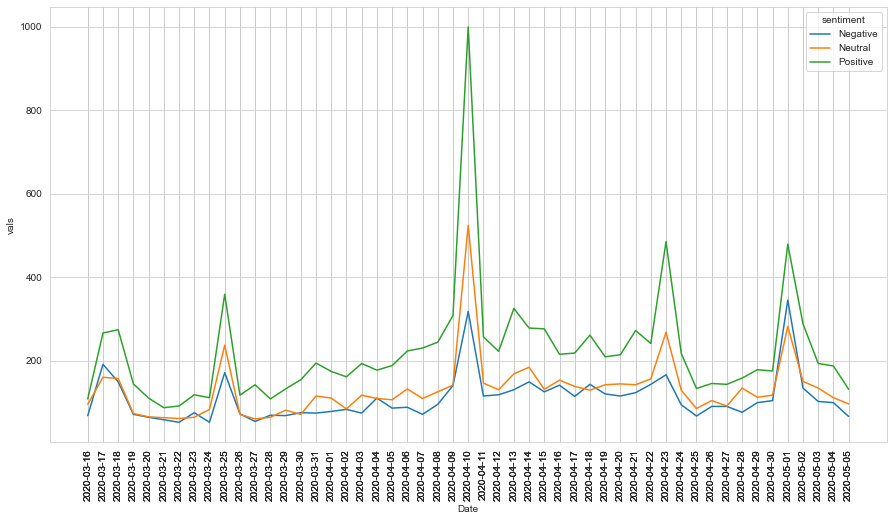

In [152]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
timeline = data.resample('D', on='Date')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("Date", var_name='sentiment',  value_name='vals')
sns.set_style("whitegrid")

g = sns.lineplot(x="Date", y="vals", hue="sentiment", data=timeline)
g.set_xticks(timeline.Date) 

0     2021-03-16
1     2021-03-17
2     2021-03-18
3     2021-03-19
4     2021-03-20
         ...    
148   2021-05-01
149   2021-05-02
150   2021-05-03
151   2021-05-04
152   2021-05-05
Name: Date, Length: 153, dtype: datetime64[ns]


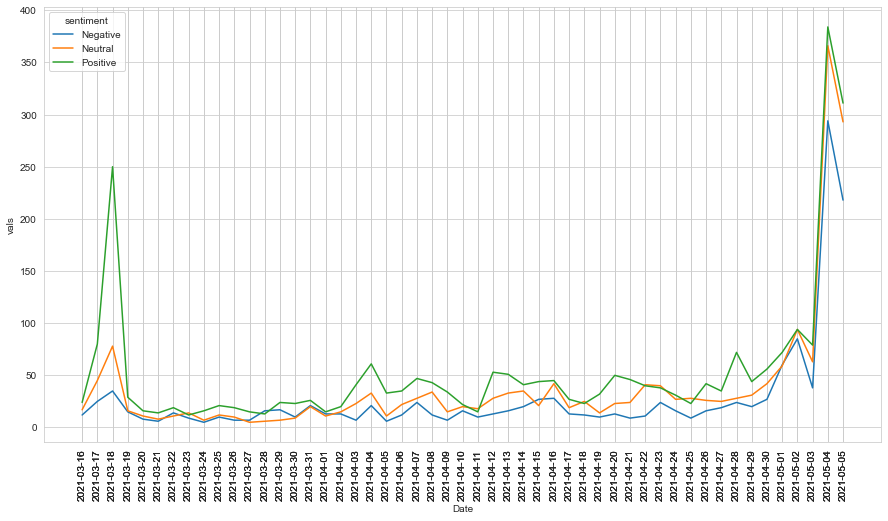

In [153]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
timeline = data21.resample('D', on='Date')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("Date", var_name='sentiment',  value_name='vals')
sns.set_style("whitegrid")
print( timeline.Date )
g = sns.lineplot(x="Date", y="vals", hue="sentiment", data=timeline)
g.set_xticks(timeline.Date) 

In [22]:
data = pd.read_csv('Tweets_Result2020.csv')  
data21 = pd.read_csv('Tweets_Result2021.csv')  

frames = [data, data21]

result = pd.concat(frames)

df = result[["Text_lemmatized", "sentiment"]]

df = df[df['sentiment'] != "Neutral"]

df['sentiment'].replace("Positive","1", inplace = True)
df['sentiment'].replace("Negative","-1", inplace = True)

,Text_lemmatized,sentiment
0,thanks pkp ken save moneyh,1
2,cant sleep pkp suck,1
3,almost 2 month pkp gonna start go office today...,1
4,nooranajwa hehe miss okay thing went different...,1
5,easy ask people stay home extend pkp youre fin...,1
...,...,...
6001,1 year anniversary msias movement control orde...,1
6002,tw suicide today mark first anniversary malays...,-1
6005,last year today 1832020 eve movement control o...,-1
6007,pm said together national immunization program...,-1


In [25]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [26]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Text_lemmatized'])
test_matrix = vectorizer.transform(test['Text_lemmatized'])

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [28]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [29]:
lr.fit(X_train,y_train)

C:\Users\Chun Kit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predictions = lr.predict(X_test)

In [31]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[1118,  205],
       [ 339, 2794]], dtype=int64)

In [32]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.77      0.85      0.80      1323
           1       0.93      0.89      0.91      3133

    accuracy                           0.88      4456
   macro avg       0.85      0.87      0.86      4456
weighted avg       0.88      0.88      0.88      4456



In [33]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [36]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
predictions = MNB.predict(X_test)

In [37]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[ 835,  195],
       [ 622, 2804]], dtype=int64)

In [38]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.57      0.81      0.67      1030
           1       0.93      0.82      0.87      3426

    accuracy                           0.82      4456
   macro avg       0.75      0.81      0.77      4456
weighted avg       0.85      0.82      0.83      4456



In [39]:
#SVM 
from sklearn import svm

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [40]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [41]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(y_pred,y_test)

array([[1151,  254],
       [ 306, 2745]], dtype=int64)

In [44]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.79      0.82      0.80      1405
           1       0.92      0.90      0.91      3051

    accuracy                           0.87      4456
   macro avg       0.85      0.86      0.86      4456
weighted avg       0.88      0.87      0.87      4456

